In [20]:
import numpy as np
import pandas as pd
import haversine
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fn = "../input/deped_school_location_with_enrolment_2017_2018_consolidated.csv"
df = pd.read_csv(fn)

In [3]:
df.head(2)

,SCHOOL ID,SCHOOL NAME,DIVISION,ADDRESS,DEPED_BARANGAY,DEPED_MUNICIPALITY,DEPED_REGION,DEPED_COORD,DEPED_LONGITUDE,DEPED_LATITUDE,...,LATITUDE,PSGC_BARANGAY,BARANGAY,PSGC_MUNICIPALITY,MUNICIPALITY,PSGC_PROVINCE,PROVINCE,PSGC_REGION,REGION,DELTA_KM
0,100160,ADAMS CES,ILOCOS NORTE,"POB. 1, ADAMS, ILOCOS NORTE",ADAMS (POB.),ADAMS,REGION I,1,120.901845,18.462302,...,18.462302,PH012801001,ADAMS (POB.),PH012801000,ADAMS,PH012800000,ILOCOS NORTE,PH010000000,REGION I (ILOCOS REGION),NaN
1,100163,BUCAROT PS,ILOCOS NORTE,"BUCAROT, ADAMS, ILOCOS NORTE",ADAMS (POB.),ADAMS,REGION I,1,120.903605,18.462088,...,18.462088,PH012801001,ADAMS (POB.),PH012801000,ADAMS,PH012800000,ILOCOS NORTE,PH010000000,REGION I (ILOCOS REGION),NaN


In [46]:
df[df["SCHOOL ID"]==111788]

,SCHOOL ID,SCHOOL NAME,DIVISION,ADDRESS,DEPED_BARANGAY,DEPED_MUNICIPALITY,DEPED_REGION,DEPED_COORD,DEPED_LONGITUDE,DEPED_LATITUDE,...,LATITUDE,PSGC_BARANGAY,BARANGAY,PSGC_MUNICIPALITY,MUNICIPALITY,PSGC_PROVINCE,PROVINCE,PSGC_REGION,REGION,DELTA_KM
15180,111788,BUGA ELEMENTARY SCHOOL,ALBAY,"ZONE 3, BUGA, LIBON, ALBAY",BUGA,LIBON,REGION V,1,123.359035,13.296122,...,13.296122,PH050507013,BUGA,PH050507000,LIBON,PH050500000,ALBAY,PH050000000,REGION V (BICOL REGION),NaN


In [4]:
df.columns

Index([u'SCHOOL ID', u'SCHOOL NAME', u'DIVISION', u'ADDRESS',
       u'DEPED_BARANGAY', u'DEPED_MUNICIPALITY', u'DEPED_REGION',
       u'DEPED_COORD', u'DEPED_LONGITUDE', u'DEPED_LATITUDE', u'GMAP_COORD',
       u'GMAP_LONGITUDE', u'GMAP_LATITUDE', u'GMAP_DELTA_KM', u'SOURCE_COORD',
       u'LONGITUDE', u'LATITUDE', u'PSGC_BARANGAY', u'BARANGAY',
       u'PSGC_MUNICIPALITY', u'MUNICIPALITY', u'PSGC_PROVINCE', u'PROVINCE',
       u'PSGC_REGION', u'REGION', u'DELTA_KM'],
      dtype='object')

In [5]:
len(df)

47358

In [6]:
df["DEPED_COORD"].value_counts()

1    41712
0     5144
2      367
3      135
Name: DEPED_COORD, dtype: int64

In [12]:
nmapped = (len(df)-5144)
nmapped, (len(df)-5144)*1./len(df) 

(42214, 0.8913805481650408)

In [13]:
41712*1./nmapped

0.9881082105462643

In [14]:
365./nmapped, 135./nmapped

(0.008646420618752072, 0.003197991187757616)

In [15]:
df["SOURCE_COORD"].value_counts()

DEPED    41712
GMAP      3621
Name: SOURCE_COORD, dtype: int64

In [44]:
df["SOURCE_COORD"].value_counts().sum(), df["SOURCE_COORD"].value_counts().sum()*1./len(df)

(45333, 0.9572405929304447)

In [45]:
41712./len(df)

0.8807804383631066

In [16]:
df1 = df[df["SOURCE_COORD"]=="GMAP"]
len(df1[df1["GMAP_DELTA_KM"]<100.])

3454

In [17]:
3454./3621

0.9538801436067385

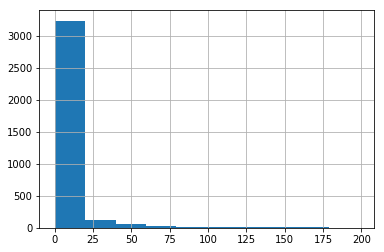

In [24]:
df1.loc[df1["GMAP_DELTA_KM"]<200, "GMAP_DELTA_KM"].hist()

In [26]:
df.loc[(df["DEPED_COORD"]>=2), "GMAP_COORD"].value_counts()

1    301
0    170
2     31
Name: GMAP_COORD, dtype: int64

In [28]:
len(df[((df["DEPED_COORD"]>=2) & (df["GMAP_COORD"]==1)) & (df["GMAP_DELTA_KM"]<100.)])

280

In [27]:
df.loc[(df["DEPED_COORD"]==0), "GMAP_COORD"].value_counts()

1    3320
0    1632
2     192
Name: GMAP_COORD, dtype: int64

In [29]:
len(df[((df["DEPED_COORD"]==0) & (df["GMAP_COORD"]==1)) & (df["GMAP_DELTA_KM"]<100.)])

3174

In [36]:
region = df["DEPED_REGION"].value_counts()

In [35]:
region2 = df.loc[df["SOURCE_COORD"].notnull(), "DEPED_REGION"].value_counts()

In [41]:
region1 = df.loc[df["DEPED_COORD"]>0, "DEPED_REGION"].value_counts()

In [40]:
df_region = pd.merge(region, region2, left_index=True, right_index=True)
df_region["PCT"] = df_region["DEPED_REGION_y"]*1./df_region["DEPED_REGION_x"]
df_region.sort_values(by="PCT", ascending=False)

,DEPED_REGION_x,DEPED_REGION_y,PCT
REGION V,3824,3785,0.989801
CAR,1829,1810,0.989612
REGION I,2872,2837,0.987813
NCR,819,807,0.985348
REGION IX,2551,2513,0.985104
REGION IV-A,3550,3497,0.985070
REGION III,3670,3614,0.984741
REGION VI,4035,3963,0.982156
REGION VIII,4190,4102,0.978998
CARAGA,2071,1996,0.963786


In [42]:
# PCT. of schools mapped by DepEd
df_region = pd.merge(region, region1, left_index=True, right_index=True)
df_region["PCT"] = df_region["DEPED_REGION_y"]*1./df_region["DEPED_REGION_x"]
df_region.sort_values(by="PCT", ascending=False)

,DEPED_REGION_x,DEPED_REGION_y,PCT
CAR,1829,1794,0.980864
REGION V,3824,3725,0.974111
REGION IX,2551,2470,0.968248
REGION VI,4035,3879,0.961338
REGION VIII,4190,4000,0.954654
REGION I,2872,2711,0.943942
REGION III,3670,3441,0.937602
REGION IV-B,2337,2191,0.937527
REGION IV-A,3550,3324,0.936338
CARAGA,2071,1939,0.936263
